Epoch 0, Loss: 6.728971004486084
Epoch 10, Loss: 6.461664199829102
Epoch 20, Loss: 6.207180023193359
Epoch 30, Loss: 5.9648966789245605
Epoch 40, Loss: 5.734224796295166
Epoch 50, Loss: 5.5146002769470215
Epoch 60, Loss: 5.3054890632629395
Epoch 70, Loss: 5.106382846832275
Epoch 80, Loss: 4.916797637939453
Epoch 90, Loss: 4.73627233505249
Epoch 100, Loss: 4.564367771148682
Epoch 110, Loss: 4.400668144226074
Epoch 120, Loss: 4.244775295257568
Epoch 130, Loss: 4.096312046051025
Epoch 140, Loss: 3.9549179077148438
Epoch 150, Loss: 3.820251703262329
Epoch 160, Loss: 3.6919872760772705
Epoch 170, Loss: 3.5698153972625732
Epoch 180, Loss: 3.4534411430358887
Epoch 190, Loss: 3.3425838947296143
Epoch 200, Loss: 3.2369775772094727
Epoch 210, Loss: 3.136366605758667
Epoch 220, Loss: 3.040510654449463
Epoch 230, Loss: 2.9491798877716064
Epoch 240, Loss: 2.862154483795166
Epoch 250, Loss: 2.7792270183563232
Epoch 260, Loss: 2.7001993656158447
Epoch 270, Loss: 2.6248819828033447
Epoch 280, Loss: 2.

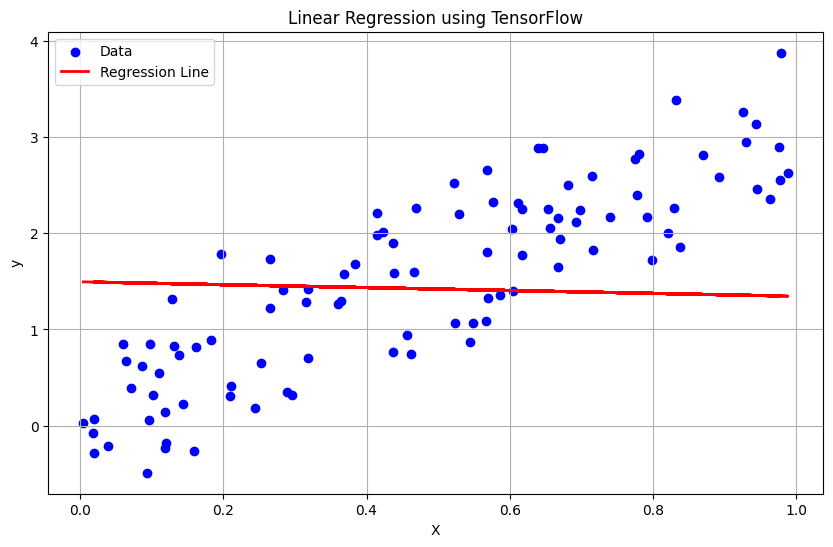

In [93]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1) * 0.5

# Define the model
class LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        return self.dense(inputs)

# Instantiate the model
model = LinearRegressionModel()

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError()

# Training loop
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        predictions = model(X, training=True)
        loss_value = loss_fn(y, predictions)

    # Compute gradients
    gradients = tape.gradient(loss_value, model.trainable_variables)
    
    # Apply gradients
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss_value.numpy()}')

# Make predictions
predictions = model(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using TensorFlow')
plt.legend()
plt.grid(True)
plt.show()
